## This is the script from Univariate_Multivariate_regressions, with some updates. The previous notebook is unnecessary.

In [2]:
import pandas as pd
import numpy as np

from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline
sns.set_style("white")
sns.set_context("talk")

### Data

In [6]:
# r'Users/amandaquay/Box\ Sync/90904_FinalProject/SanJoaquinSalinityML/
pathway = 'data_average_after_indices.csv'
df = pd.read_csv(pathway, index_col=0).dropna()     
# extract independent variables of use
df_small = df[['salinity', 'Field_ID', 'max_CRSI', 'elevation', 'aspect', 
               'slope', 'ucr_temperature', 'ucr_precipitation']]
df_small.head()

,salinity,Field_ID,max_CRSI,elevation,aspect,slope,ucr_temperature,ucr_precipitation
0,0.010,1.0,0.774290,66,328,1,289.7135,175.963
1,1.997,1.0,0.773924,66,340,0,289.7135,175.963
2,3.827,1.0,0.781937,66,152,0,289.7135,175.963
3,3.080,1.0,0.775323,66,151,0,289.7135,175.963
4,1.092,1.0,0.766537,66,149,0,289.7135,175.963


In [8]:
df_outlier_removed = df[df.Field_ID != 20.0]
print(df.size, "-->", df_outlier_removed.size, "samples when field 20 removed")

553754 --> 539654 samples when field 20 removed


In [9]:
df_small_outlier_removed = df_outlier_removed[['salinity', 'Field_ID', 'max_CRSI', 'elevation', 'aspect', 
                                               'slope', 'ucr_temperature', 'ucr_precipitation']]
df_small_outlier_removed.head()

,salinity,Field_ID,max_CRSI,elevation,aspect,slope,ucr_temperature,ucr_precipitation
0,0.010,1.0,0.774290,66,328,1,289.7135,175.963
1,1.997,1.0,0.773924,66,340,0,289.7135,175.963
2,3.827,1.0,0.781937,66,152,0,289.7135,175.963
3,3.080,1.0,0.775323,66,151,0,289.7135,175.963
4,1.092,1.0,0.766537,66,149,0,289.7135,175.963


In [10]:
df_fully_clean = df[df.Field_ID != 20.0]
df_fully_clean = df_fully_clean[df_fully_clean.Field_ID != 2.0]
df_fully_clean = df_fully_clean[df_fully_clean.Field_ID != 19.0]
df_small_fully_clean = df_fully_clean[['salinity', 'Field_ID', 'max_CRSI', 'elevation', 'aspect', 
                                               'slope', 'ucr_temperature', 'ucr_precipitation']]
df_small_fully_clean.head()

,salinity,Field_ID,max_CRSI,elevation,aspect,slope,ucr_temperature,ucr_precipitation
0,0.010,1.0,0.774290,66,328,1,289.7135,175.963
1,1.997,1.0,0.773924,66,340,0,289.7135,175.963
2,3.827,1.0,0.781937,66,152,0,289.7135,175.963
3,3.080,1.0,0.775323,66,151,0,289.7135,175.963
4,1.092,1.0,0.766537,66,149,0,289.7135,175.963


### Functions

In [11]:
# input:  dataframe, optional specification of field to leave out  (otherwise will select randomly)
# output: LOFO rows set as X_test (features) and y_test (target);
#         non-LOFO rows set as X_train (features) and y_train (target)

def train_test_split_lofo(df, test_field=None):
    fields = df['Field_ID'].unique()
    if test_field is None: test_field = np.array([np.random.choice(fields)])
    else: test_field=np.array([test_field])
    train_fields = np.setdiff1d(fields, test_field)

    test_field_indices = np.where(df['Field_ID'].isin(test_field))[0]
    train_field_indices = np.where(df['Field_ID'].isin(train_fields))[0]

    y = df['salinity'].values.reshape(-1,1)
    X = df.drop(['Field_ID', 'salinity'], axis=1).values

    y_train = y[train_field_indices]
    y_test = y[test_field_indices]
    X_train = X[train_field_indices]
    X_test = X[test_field_indices]

    return X_train, y_train, X_test, y_test

In [12]:
# input:  dataframe
# output: y_hat (predictions for y_test using X_test and model LinearRegression);
#         mse (mean sq. error comparing y_hat with y_test)

def cross_validate_lofo(df):
    
    y_hat = np.array([])
    coef_array = np.array([])
    intercept_array = np.array([])
    fields = df['Field_ID'].unique()
    
    for field in fields:
        X_train, y_train, X_test, y_test = train_test_split_lofo(df, field)
        model = linear_model.LinearRegression()
        model.fit(X_train, y_train)
        y_hat = np.append(y_hat, model.predict(X_test)) # predictions
        coef_array = np.append(coef_array, model.coef_)
        intercept_array = np.append(intercept_array, model.intercept_)
        print(field, ": MSE =", np.mean((y_test - y_hat)**2))
    
    mse = np.mean((y - y_hat)**2)
    avg_coef = np.mean(coef_array)
    avg_intercept = np.mean(intercept_array)
    
    return y_hat, mse, avg_coef, avg_intercept

In [13]:
# input:  dataframe
# output: y_hat (predictions for y_test using X_test and model LinearRegression);
#         mse (mean sq. error comparing y_hat with y_test)

def cross_validate_lofo_multivar(df):
    
    y_hat = np.array([])
    coef_array_0 = np.array([])
    coef_array_1 = np.array([])
    coef_array_2 = np.array([])
    coef_array_3 = np.array([])
    coef_array_4 = np.array([])
    coef_array_5 = np.array([])
    intercept_array = np.array([])
    fields = df['Field_ID'].unique()
    
    for field in fields:
        X_train, y_train, X_test, y_test = train_test_split_lofo(df, field)
        model = linear_model.LinearRegression()
        model.fit(X_train, y_train)
        y_hat = np.append(y_hat, model.predict(X_test)) # predictions
        coef_array_0 = np.append(coef_array_0, model.coef_[0][0])
        coef_array_1 = np.append(coef_array_1, model.coef_[0][1])
        coef_array_2 = np.append(coef_array_2, model.coef_[0][2])
        coef_array_3 = np.append(coef_array_3, model.coef_[0][3])
        coef_array_4 = np.append(coef_array_4, model.coef_[0][4])
        coef_array_5 = np.append(coef_array_5, model.coef_[0][5])
        intercept_array = np.append(intercept_array, model.intercept_)
        print(field, ": MSE =", np.mean((y_test - y_hat)**2))
    
    mse = np.mean((y - y_hat)**2)
    avg_coef_0 = np.mean(coef_array_0)
    avg_coef_1 = np.mean(coef_array_1)
    avg_coef_2 = np.mean(coef_array_2)
    avg_coef_3 = np.mean(coef_array_3)
    avg_coef_4 = np.mean(coef_array_4)
    avg_coef_5 = np.mean(coef_array_5)
    avg_intercept = np.mean(intercept_array)
    
    return y_hat, mse, avg_coef_0, avg_coef_1, avg_coef_2, avg_coef_3, avg_coef_4, avg_coef_5, avg_intercept

In [14]:
# input: actual and predicted y_test, ylim and xlim optional if the frame needs to be expanded for some reason
# output: plot of actual and predicted salinity for test field(s)
def plot_actual_vs_predicted(actual, predicted, ylim=(0,40), xlim=(0,40)):
    plt.scatter(actual, predicted, s=5)
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.plot((0,40),(0,40), linewidth=2, color='black')
    plt.xlabel('Actual Salinity (dS/m)')
    plt.ylabel('Predicted Salinity (dS/m)')
    plt.show()

In [15]:
def plot_actual_vs_predicted_fields(actual, predicted, field_list, in_ylim=(0,40), in_xlim=(0,40)):
    field_dict = { 1.0:[179,0,0],  2.0:[255,51,51],  3.0:[255,153,153],  4.0:[255,133,51],  5.0:[255,179,102],
              6.0:[255,255,26],  7.0:[172,230,0],  8.0:[115,153,0],  9.0:[0,102,34], 10.0:[0,204,102],
             11.0:[0,230,184], 12.0:[102,194,255], 13.0:[0,57,230], 14.0:[153,153,255], 15.0:[255,153,255],
             16.0:[204,0,204], 17.0:[122,0,204], 18.0:[191,128,64], 19.0:[102,51,0], 20.0:[0,0,0],
             21.0:[115,115,115], 22.0:[217,217,217]}
    # normalize this ish
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.xlim(in_xlim)
    plt.ylim(in_ylim)
    plt.tick_params(labelsize = 18)
    plt.plot((0,40),(0,40), linewidth=2, color='black')
    plt.xlabel('Actual Salinity (dS/m)', fontsize = 20)
    plt.ylabel('Predicted Salinity (dS/m)', fontsize = 20)
    for k, val in field_dict.items():
        for i in range(3): # normalize the RGB values so that matplotlib will allow as input
            field_dict[k][i] = field_dict[k][i]/255.0 
        # find all rows from same field, add to temp lists, and plot them
        temp_y = []
        temp_y_hat = []
        for i in range(len(field_list)): 
            if (k == field_list[i]):
                temp_y.append(actual[i])
                temp_y_hat.append(predicted[i])
        plt.scatter(temp_y, temp_y_hat, s = 5, c = val, label = k) # plot one field at a time to separate labels
    plt.legend(loc = 'upper left', bbox_to_anchor=(1,1), ncol = 2)
    ax.legend(markerscale=4, loc = 'upper left', bbox_to_anchor = (1,1), ncol = 2)
    plt.show()

### Univariate Linear Regression (LOFO): max_CRSI --> salinity
#### Full Dataset

In [16]:
# univariate using max_CRSI as sole feature
y = df['salinity'].values
X = df['max_CRSI'].values.reshape(len(df),1)

In [17]:
y_hat, mse, co, inter = cross_validate_lofo(df[['Field_ID', 'salinity', 'max_CRSI']])

1.0 : MSE = 63.222085790962275
2.0 : MSE = 68.98064646489625
3.0 : MSE = 36.84913111926726
4.0 : MSE = 31.168526078124778
5.0 : MSE = 23.507788946537936
6.0 : MSE = 33.82142888153817
7.0 : MSE = 32.727685729941335
8.0 : MSE = 16.55286820092874
9.0 : MSE = 16.695783324813412
10.0 : MSE = 91.09992410548611
11.0 : MSE = 46.768970059504255
12.0 : MSE = 56.618752227636286
13.0 : MSE = 45.60232563785231
14.0 : MSE = 23.336807882626783
15.0 : MSE = 30.024464332439873
16.0 : MSE = 39.312305592521845
17.0 : MSE = 23.58373204533555
18.0 : MSE = 106.25967966254345
19.0 : MSE = 15.153859237097384
20.0 : MSE = 534.1869765032071
21.0 : MSE = 61.218247699507906
22.0 : MSE = 52.929292512716884


In [18]:
print("The univariate prediction is: salinity = (%.3f * max_CRSI) + %.3f" %(co, inter))

The univariate prediction is: salinity = (-106.987 * max_CRSI) + 94.751


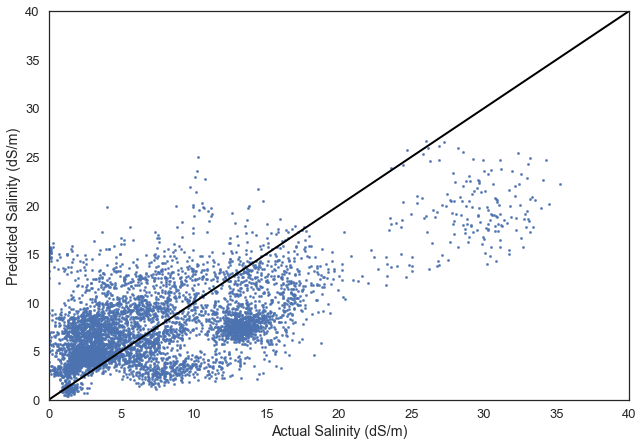

In [19]:
plot_actual_vs_predicted(y, y_hat)

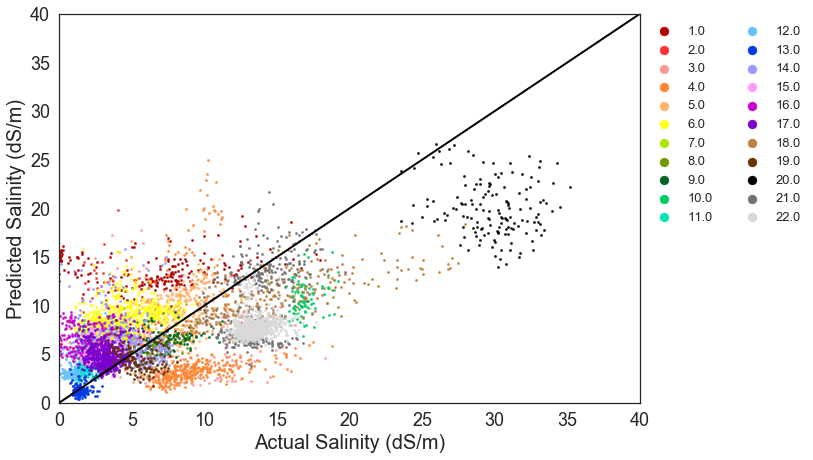

In [20]:
field_list = df['Field_ID'].values
plot_actual_vs_predicted_fields(y, y_hat, field_list)

In [21]:
print('MAE: %.2f' % np.mean(abs(y_hat - y)))
print('MSE: %.2f' % np.mean((y_hat-y)**2))
print('RMSE: %.2f' % np.mean(((y_hat-y)**2)**.5))
print('R_squared: %.2f' % r2_score(y, y_hat))

MAE: 3.85
MSE: 23.03
RMSE: 3.85
R_squared: 0.39


#### Removing Outlier Field (Field #20)

In [22]:
# univariate using max_CRSI as sole feature
y = df_outlier_removed['salinity'].values
X = df_outlier_removed['max_CRSI'].values.reshape(len(df_outlier_removed),1)

In [23]:
y_hat, mse, co, inter = cross_validate_lofo(df_outlier_removed[['Field_ID', 'salinity', 'max_CRSI']])

1.0 : MSE = 49.03984233198166
2.0 : MSE = 55.30378552043185
3.0 : MSE = 30.089744412769132
4.0 : MSE = 25.1737267255357
5.0 : MSE = 18.028145143581295
6.0 : MSE = 27.18601129746849
7.0 : MSE = 26.054549629141782
8.0 : MSE = 11.842480439549725
9.0 : MSE = 12.443306601842103
10.0 : MSE = 92.98331881713406
11.0 : MSE = 40.34764685727063
12.0 : MSE = 50.21292786620451
13.0 : MSE = 39.849861448988214
14.0 : MSE = 18.435926218941304
15.0 : MSE = 25.369736330294046
16.0 : MSE = 34.71605127666426
17.0 : MSE = 19.813648727398704
18.0 : MSE = 103.12052692277723
19.0 : MSE = 10.65905605611585
21.0 : MSE = 58.38266303979057
22.0 : MSE = 50.91088957181931


In [24]:
print("The univariate prediction is: salinity = (%.3f * max_CRSI) + %.3f" %(co, inter))

The univariate prediction is: salinity = (-86.138 * max_CRSI) + 77.511


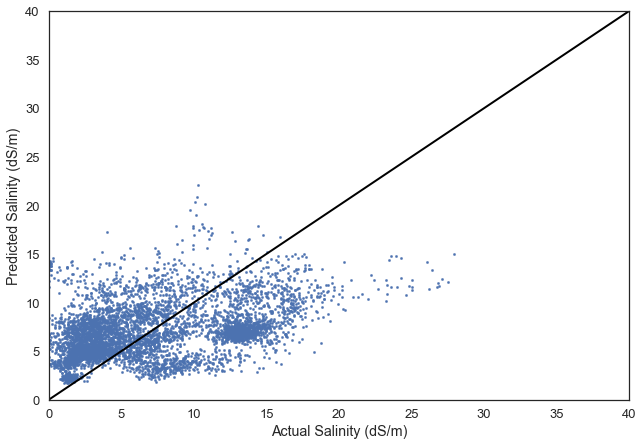

In [25]:
plot_actual_vs_predicted(y, y_hat)

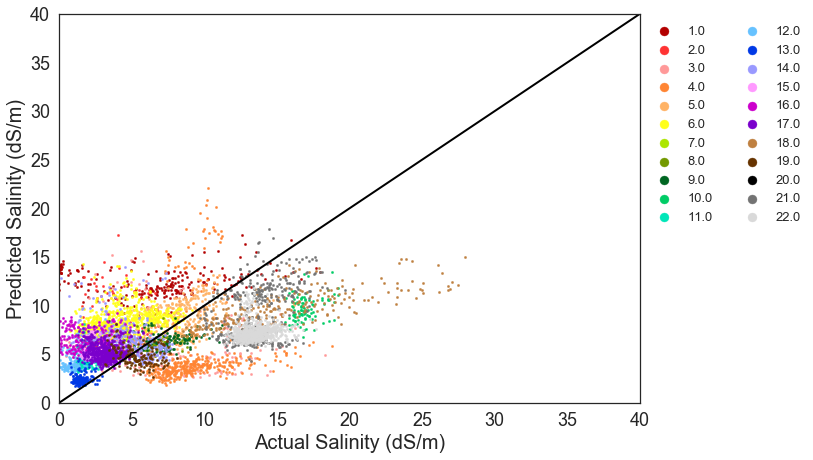

In [26]:
field_list = df_small_outlier_removed['Field_ID'].values
plot_actual_vs_predicted_fields(y, y_hat, field_list)

In [27]:
print('MAE: %.2f' % np.mean(abs(y_hat - y)))
print('MSE: %.2f' % np.mean((y_hat-y)**2))
print('RMSE: %.2f' % np.mean(((y_hat-y)**2)**.5))
print('R_squared: %.2f' % r2_score(y, y_hat))

MAE: 3.82
MSE: 21.03
RMSE: 3.82
R_squared: 0.16


#### Removing Outlier Field (Field #20) AND The Exploration Fields (Fields 2 and 19)

In [28]:
# univariate using max_CRSI as sole feature
y = df_fully_clean['salinity'].values
X = df_fully_clean['max_CRSI'].values.reshape(len(df_fully_clean),1)

In [29]:
y_hat, mse, co, inter = cross_validate_lofo(df_fully_clean[['Field_ID', 'salinity', 'max_CRSI']])

1.0 : MSE = 52.487404069108514
3.0 : MSE = 35.60399557666445
4.0 : MSE = 28.41729448212544
5.0 : MSE = 20.214539498808062
6.0 : MSE = 30.090146480151137
7.0 : MSE = 28.983694001534186
8.0 : MSE = 13.39607194950707
9.0 : MSE = 13.70462268435419
10.0 : MSE = 90.23196584902013
11.0 : MSE = 42.96338291117049
12.0 : MSE = 52.892065476396745
13.0 : MSE = 42.01508140193719
14.0 : MSE = 19.816847016125106
15.0 : MSE = 26.894303146135197
16.0 : MSE = 36.375666016101924
17.0 : MSE = 20.982954143480928
18.0 : MSE = 102.10685251649284
21.0 : MSE = 56.81999258305902
22.0 : MSE = 49.37063815867381


In [30]:
print("The univariate prediction is: salinity = (%.3f * max_CRSI) + %.3f" %(co, inter))

The univariate prediction is: salinity = (-88.515 * max_CRSI) + 79.557


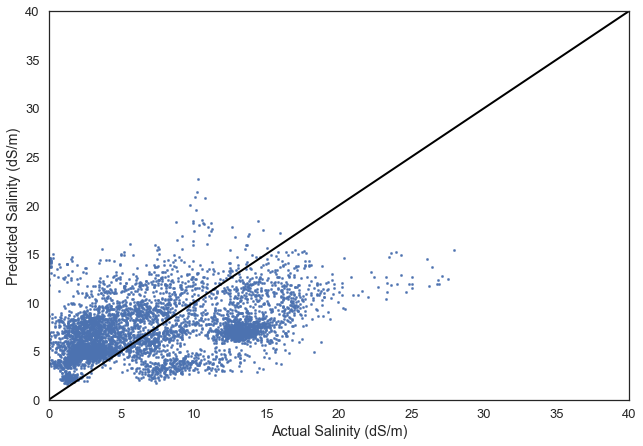

In [31]:
plot_actual_vs_predicted(y, y_hat)

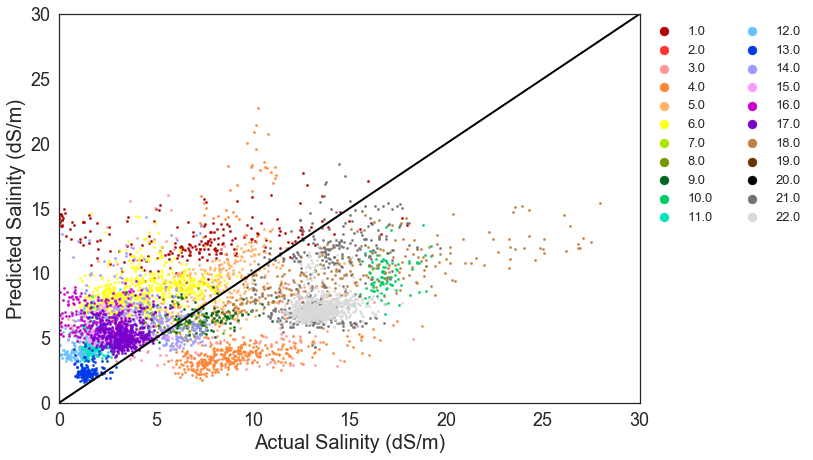

In [32]:
field_list = df_fully_clean['Field_ID'].values
plot_actual_vs_predicted_fields(y, y_hat, field_list, in_ylim = (0,30), in_xlim = (0,30))

In [33]:
print('MAE: %.2f' % np.mean(abs(y_hat - y)))
print('MSE: %.2f' % np.mean((y_hat-y)**2))
print('RMSE: %.2f' % np.mean(((y_hat-y)**2)**.5))
print('R_squared: %.2f' % r2_score(y, y_hat))

MAE: 3.91
MSE: 21.75
RMSE: 3.91
R_squared: 0.16


### Multivariate Linear Regression (LOFO): max_CRSI, elevation, aspect, slope, margins, average_temperature, total_precipitation --> salinity 
#### Full Dataset

In [34]:
y = df_small['salinity'].values
drop_columns = [0, 1] # drop_columns: salinity and field ID
X = df_small.drop(df_small.columns[drop_columns], axis = 1).values

In [35]:
y_hat, mse, avg_coef_0, avg_coef_1, avg_coef_2, avg_coef_3, avg_coef_4, avg_coef_5, avg_intercept = cross_validate_lofo_multivar(df_small)

# y_hat, mse, avg_coef, inter = cross_validate_lofo(df_small)

1.0 : MSE = 69.42514918973401
2.0 : MSE = 74.66612175017123
3.0 : MSE = 39.89996782163544
4.0 : MSE = 44.47714824399023
5.0 : MSE = 32.99100694628302
6.0 : MSE = 40.54614406608318
7.0 : MSE = 39.30358972384424
8.0 : MSE = 23.617082219629502
9.0 : MSE = 23.464241313333844
10.0 : MSE = 100.79752741796912
11.0 : MSE = 51.58306819196288
12.0 : MSE = 61.51744523017449
13.0 : MSE = 50.133449339554026
14.0 : MSE = 26.85946474215803
15.0 : MSE = 33.475188588348274
16.0 : MSE = 42.72747433092835
17.0 : MSE = 26.45906651878462
18.0 : MSE = 107.7511259345863
19.0 : MSE = 17.271139543669605
20.0 : MSE = 535.9957264804602
21.0 : MSE = 61.806258670828235
22.0 : MSE = 55.63814647900309


In [36]:
print("The multivariate prediction is: salinity = (%.3f * max_CRSI) + (%.3f * elevation) + (%.3f * aspect) + (%.3f * slope) + (%.3f * average_temperature) + (%.3f * total_precipitation) + %.3f" %(avg_coef_0, avg_coef_1, avg_coef_2, avg_coef_3, avg_coef_4, avg_coef_5, avg_intercept))

The multivariate prediction is: salinity = (-106.585 * max_CRSI) + (-0.017 * elevation) + (0.001 * aspect) + (-2.351 * slope) + (0.400 * average_temperature) + (0.007 * total_precipitation) + -21.982


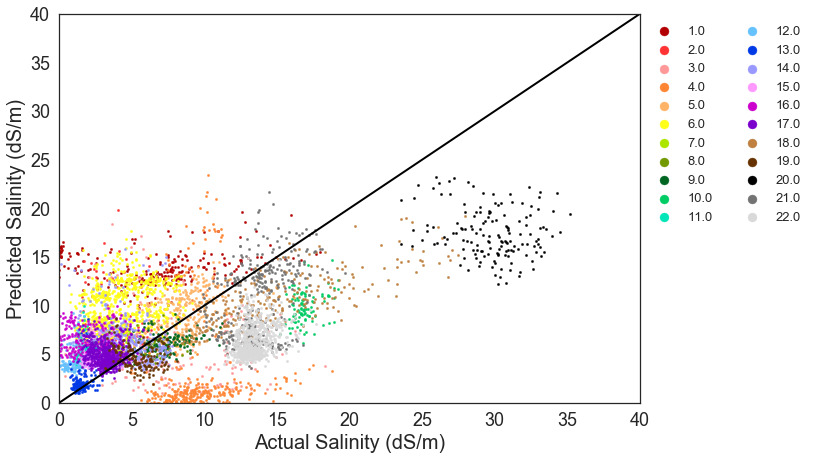

In [37]:
field_list = df['Field_ID'].values
plot_actual_vs_predicted_fields(y, y_hat, field_list)

In [38]:
print('MAE: %.2f' % np.mean(abs(y_hat - y)))
print('MSE: %.2f' % np.mean((y_hat-y)**2))
print('RMSE: %.2f' % np.mean(((y_hat-y)**2)**.5))
print('R_squared: %.2f' % r2_score(y, y_hat))

MAE: 4.53
MSE: 31.61
RMSE: 4.53
R_squared: 0.16


#### Removing Outlier Field (Field #20)

In [39]:
y = df_small_outlier_removed['salinity'].values
drop_columns = [0, 1]

X = df_small_outlier_removed.drop(df_small.columns[drop_columns], axis = 1).values

In [40]:
y_hat, mse, avg_coef_0, avg_coef_1, avg_coef_2, avg_coef_3, avg_coef_4, avg_coef_5, avg_intercept = cross_validate_lofo_multivar(df_small_outlier_removed)

# y_hat, mse, avg_coef, inter = cross_validate_lofo(df_small)
# y_hat, mse, co, inter = cross_validate_lofo(df_small_outlier_removed) # so now field 20 won't exist

1.0 : MSE = 54.63201317272809
2.0 : MSE = 60.64299031599659
3.0 : MSE = 30.88160836654811
4.0 : MSE = 31.529788574861406
5.0 : MSE = 22.579377696088986
6.0 : MSE = 35.62760498295603
7.0 : MSE = 34.481724052565454
8.0 : MSE = 18.225581840679627
9.0 : MSE = 18.337934695273308
10.0 : MSE = 95.27828770032663
11.0 : MSE = 46.45668815944979
12.0 : MSE = 56.18418028081355
13.0 : MSE = 45.24399842687235
14.0 : MSE = 22.69151631163134
15.0 : MSE = 29.203037994539237
16.0 : MSE = 38.17835979247928
17.0 : MSE = 23.43736040258887
18.0 : MSE = 105.14698102350596
19.0 : MSE = 13.380915728499232
21.0 : MSE = 61.23611017563292
22.0 : MSE = 55.70602380157252


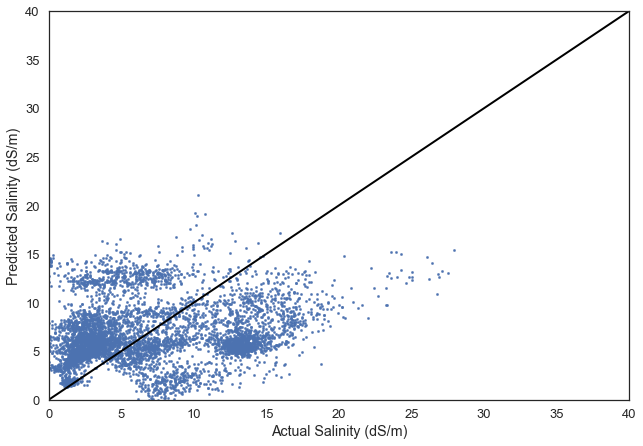

In [41]:
plot_actual_vs_predicted(y, y_hat)

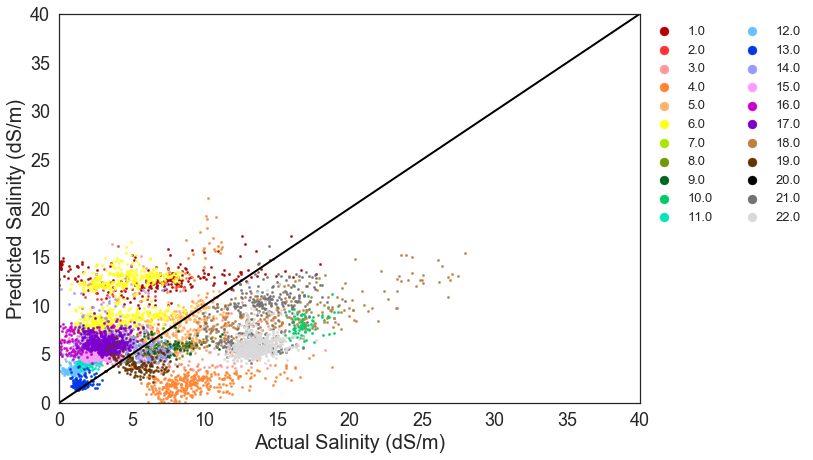

In [42]:
field_list = df_small_outlier_removed['Field_ID'].values
plot_actual_vs_predicted_fields(y, y_hat, field_list)

In [43]:
print('MAE: %.2f' % np.mean(abs(y_hat - y)))
print('MSE: %.2f' % np.mean((y_hat-y)**2))
print('RMSE: %.2f' % np.mean(((y_hat-y)**2)**.5))
print('R_squared: %.2f' % r2_score(y, y_hat))

MAE: 4.48
MSE: 28.84
RMSE: 4.48
R_squared: -0.15


#### Removing Outlier Field (Field #20) AND the Explored Fields (#2, #19)

In [44]:
y = df_small_fully_clean['salinity'].values
drop_columns = [0, 1]

X = df_small_fully_clean.drop(df_small_fully_clean.columns[drop_columns], axis = 1).values

In [45]:
y_hat, mse, avg_coef_0, avg_coef_1, avg_coef_2, avg_coef_3, avg_coef_4, avg_coef_5, avg_intercept = cross_validate_lofo_multivar(df_small_fully_clean)


1.0 : MSE = 60.78395937675919
3.0 : MSE = 38.21142731170328
4.0 : MSE = 39.17726071470013
5.0 : MSE = 27.503972230826616
6.0 : MSE = 40.409242350182005
7.0 : MSE = 39.24400098507249
8.0 : MSE = 21.474952653546648
9.0 : MSE = 21.180534373102947
10.0 : MSE = 94.48476604346756
11.0 : MSE = 49.88526325981322
12.0 : MSE = 59.50675007459381
13.0 : MSE = 48.022071755214405
14.0 : MSE = 24.830921379849176
15.0 : MSE = 31.15200247705542
16.0 : MSE = 39.9970155706638
17.0 : MSE = 25.338642856657543
18.0 : MSE = 105.03154642418971
21.0 : MSE = 60.152051702951745
22.0 : MSE = 54.59828616580637


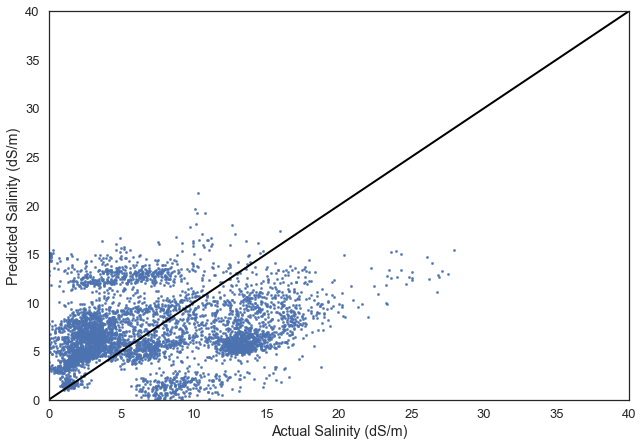

In [46]:
plot_actual_vs_predicted(y, y_hat)

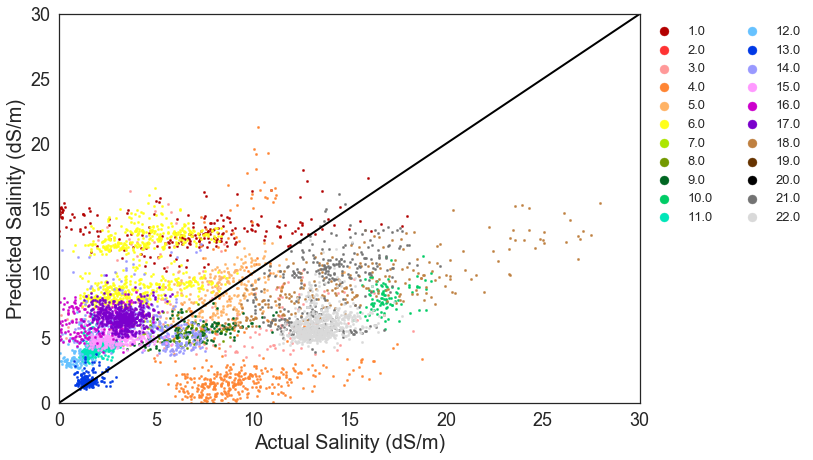

In [47]:
field_list = df_small_fully_clean['Field_ID'].values
plot_actual_vs_predicted_fields(y, y_hat, field_list, in_ylim=(0,30), in_xlim=(0,30))

In [48]:
print('MAE: %.2f' % np.mean(abs(y_hat - y)))
print('MSE: %.2f' % np.mean((y_hat-y)**2))
print('RMSE: %.2f' % np.mean(((y_hat-y)**2)**.5))
print('R_squared: %.2f' % r2_score(y, y_hat))

MAE: 4.64
MSE: 30.46
RMSE: 4.64
R_squared: -0.17


In [49]:
print("The multivariate prediction is: salinity = (%.5f * max_CRSI) + (%.3f * elevation) + (%.5f * aspect) + (%.3f * slope) + (%.3f * average_temperature) + (%.3f * total_precipitation) + %.3f" %(avg_coef_0, avg_coef_1, avg_coef_2, avg_coef_3, avg_coef_4, avg_coef_5, avg_intercept))

The multivariate prediction is: salinity = (-76.90918 * max_CRSI) + (0.010 * elevation) + (0.00135 * aspect) + (-1.886 * slope) + (-0.333 * average_temperature) + (0.007 * total_precipitation) + 165.232
